## Física Aplicada: Análise de Dados

`Nomes:`
* Alice Vitória Boschetti
* Felipe Cordeiro Carvalho
* Gabriel Frigo Sena Silva
* Joyce Nunes Alves
* Eduardo Marques dos Santos
* Kimberly Oliveira Germano Ribeiro

## Import

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Dataframe

In [47]:
df = pd.read_csv('./data/df.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,D1,D2,diferenca_D1_D2,desvio_absoluto_D1,desvio_absoluto_D2,volume_V1,volume_V2,diferença_V1_V2,desvio_absoluto_V1,desvio_absoluto_V2
0,18.50,18.60,0.10,-0.4607,-0.3413,3315.231098,3369.282723,54.051625,-263.390298,-198.242367
1,18.53,18.63,0.10,-0.4307,-0.3113,3331.385417,3385.612013,54.226596,-247.235979,-181.913077
2,19.51,19.51,0.00,0.5493,0.5687,3888.395488,3888.395488,0.000000,309.774092,320.870398
3,19.40,19.40,0.00,0.4393,0.4587,3822.995723,3822.995723,0.000000,244.374327,255.470633
4,18.60,18.62,0.02,-0.3607,-0.3213,3369.282723,3380.163068,10.880345,-209.338673,-187.362022


In [48]:
df_resultados = pd.read_csv('./data/df_resultados.csv')
df_resultados.columns = ['Incerteza absoluta e média', 'Resultado']
df_resultados


,Incerteza absoluta e média,Resultado
0,Incerteza Absoluta D1,18.9607 +- 0.4855 mm
1,Incerteza Absoluta D2,18.9413 +- 0.4695 mm
2,Incerteza Média D1,18.9607 +- 0.0565 mm
3,Incerteza Média D2,18.9413 +- 0.056 mm
4,Incerteza Absoluta V1,3578.6214 +- 274.7998 mm^3
5,Incerteza Absoluta V2,3567.5251 +- 266.5824 mm^3
6,Incerteza Média V1,3578.6214 +- 31.9706 mm^3
7,Incerteza Média V2,3567.5251 +- 31.7235 mm^3


## Análise dos dados


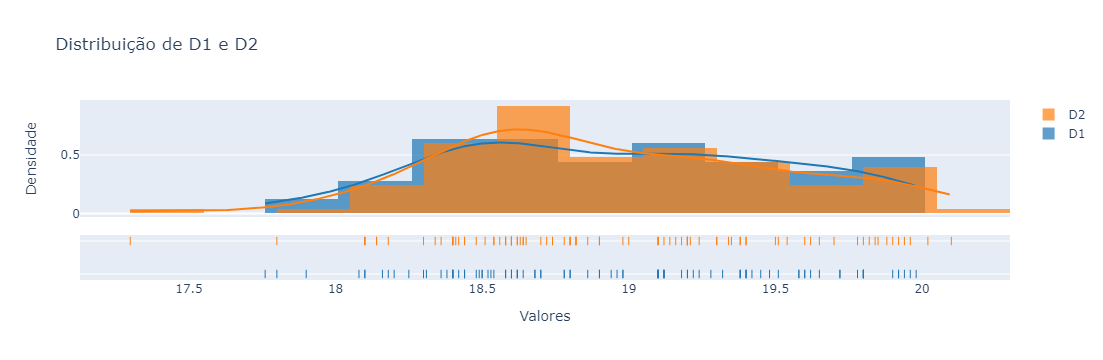

In [49]:
df_subset = df[['D1', 'D2']]

fig = ff.create_distplot([df_subset[c] for c in df_subset.columns], df_subset.columns, bin_size=0.25)

fig.update_layout(title='Distribuição de D1 e D2',
                  xaxis_title='Valores',
                  yaxis_title='Densidade')

fig.show()

O gráfico acima apresenta a variação entre as medidas coletadas entre 100 esferas, baseadas nos Diâmetro 1 (D1) e  Diâmetro 2 (D2, a mesma esfera movimentada a 90°).

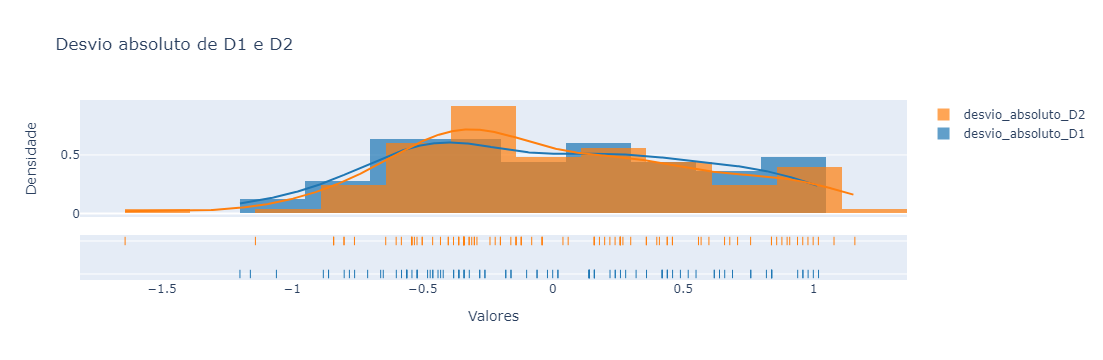

In [50]:
df_subset = df[['desvio_absoluto_D1', 'desvio_absoluto_D2']]

fig = ff.create_distplot([df_subset[c] for c in df_subset.columns], df_subset.columns, bin_size=.25)

fig.update_layout(title='Desvio absoluto de D1 e D2',
                  xaxis_title='Valores',
                  yaxis_title='Densidade')

fig.show()

O gráfico acima apresenta o valor médio dos desvios absolutos entre as medidas de D1 e D2. Esta medida apresenta o valor dos erros sistemáticos que podem aparacer durante processo de medição.

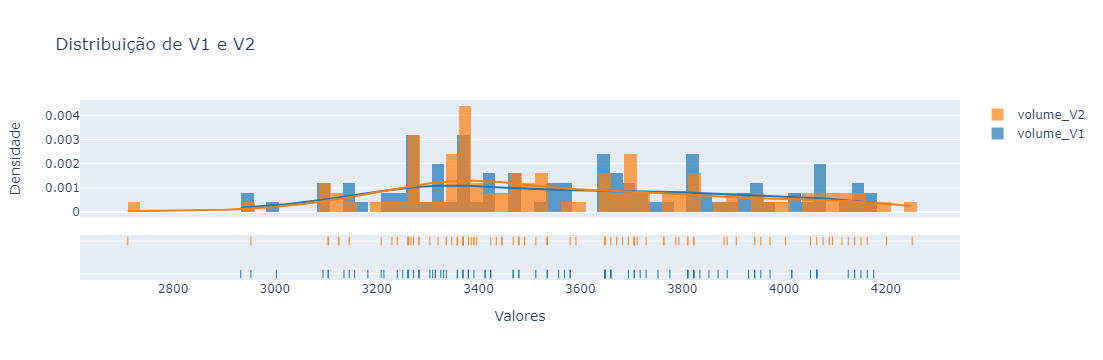

In [51]:
df_subset = df[['volume_V1', 'volume_V2']]

fig = ff.create_distplot([df_subset[c] for c in df_subset.columns], df_subset.columns, bin_size=25)

fig.update_layout(title='Distribuição de V1 e V2',
                  xaxis_title='Valores',
                  yaxis_title='Densidade')

fig.show()

O gráfico acima apresenta a distribuição do Volume das 100 esferas condicionadas a medição. Os parâmetros usados para arbitrar esses valores foram: Densidade e os Valores calculados para encontrar o volume.
**Incluir print dos cálculos feitos pelo Frigo e o Felipe. **

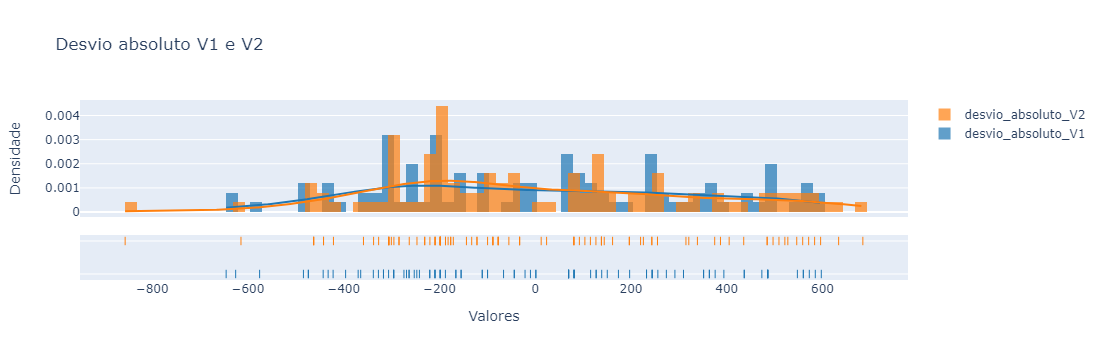

In [52]:
df_subset = df[['desvio_absoluto_V1', 'desvio_absoluto_V2']]

fig = ff.create_distplot([df_subset[c] for c in df_subset.columns], df_subset.columns, bin_size=25)

fig.update_layout(title='Desvio absoluto V1 e V2',
                  xaxis_title='Valores',
                  yaxis_title='Densidade')

fig.show()

Desvio absoluto do Volume das esferas arbitrada a partir dos valores de distribuição do Volume encontrados no último gráfico apresentado.

## Boxplot Medidas

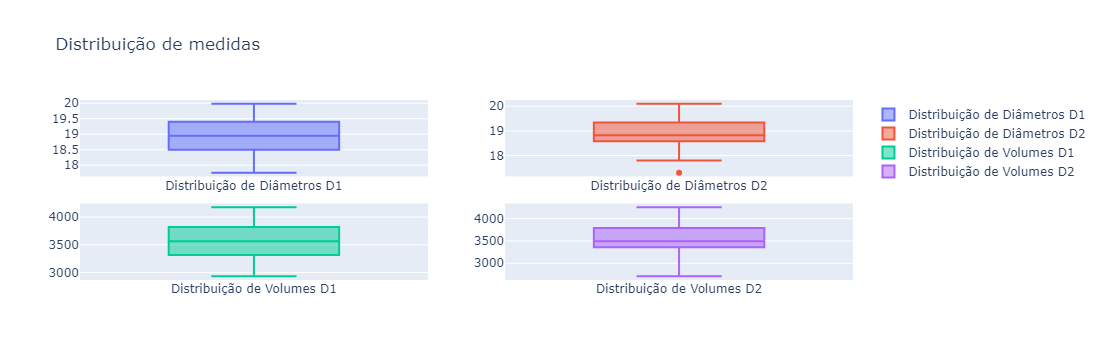

In [53]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Box(y=df['D1'], name='Distribuição de Diâmetros D1'), row=1, col=1)
fig.add_trace(go.Box(y=df['D2'], name='Distribuição de Diâmetros D2'), row=1, col=2)
fig.add_trace(go.Box(y=df['volume_V1'], name='Distribuição de Volumes D1'), row=2, col=1)
fig.add_trace(go.Box(y=df['volume_V2'], name='Distribuição de Volumes D2'), row=2, col=2)

fig.update_layout(title_text="Distribuição de medidas")

In [54]:
df['D1'].describe()

count    100.000000
mean      18.960700
std        0.567346
min       17.760000
25%       18.500000
50%       18.950000
75%       19.400000
max       19.980000
Name: D1, dtype: float64

In [55]:
df['D2'].describe()

count    100.00000
mean      18.94130
std        0.56291
min       17.30000
25%       18.58000
50%       18.82000
75%       19.34250
max       20.10000
Name: D2, dtype: float64

In [56]:
df['volume_V2'].describe()

count     100.000000
mean     3567.525090
std       318.833508
min      2711.046282
25%      3358.425751
50%      3490.257585
75%      3789.103814
max      4251.936741
Name: volume_V2, dtype: float64

In [57]:
df['volume_V1'].describe()

count     100.000000
mean     3578.621396
std       321.316763
min      2933.104300
25%      3315.231098
50%      3563.088652
75%      3822.995723
max      4176.236396
Name: volume_V1, dtype: float64

## Boxplots incertezas

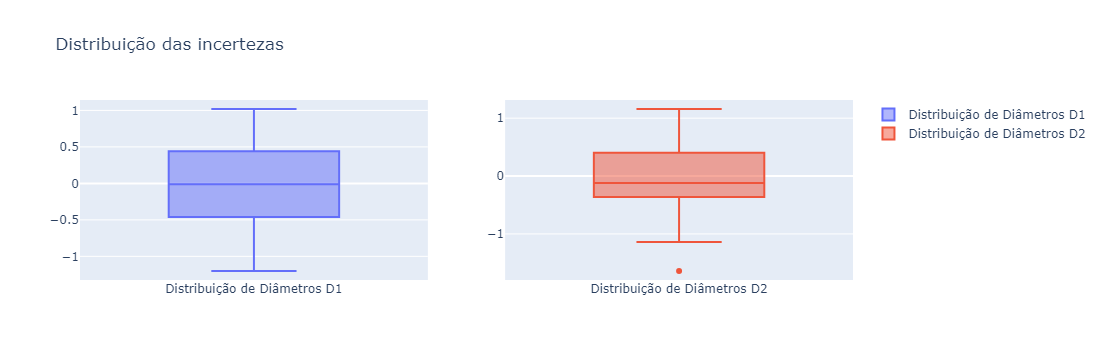

In [58]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Box(y=df['desvio_absoluto_D1'], name='Distribuição de Diâmetros D1'), row=1, col=1)
fig.add_trace(go.Box(y=df['desvio_absoluto_D2'], name='Distribuição de Diâmetros D2'), row=1, col=2)

fig.update_layout(title_text="Distribuição das incertezas")

In [59]:
df['desvio_absoluto_D1'].describe()

count    1.000000e+02
mean     9.234280e-16
std      5.673459e-01
min     -1.200700e+00
25%     -4.607000e-01
50%     -1.070000e-02
75%      4.393000e-01
max      1.019300e+00
Name: desvio_absoluto_D1, dtype: float64

In [60]:
df['desvio_absoluto_D2'].describe()

count    1.000000e+02
mean    -5.223530e-15
std      5.629103e-01
min     -1.641300e+00
25%     -3.613000e-01
50%     -1.213000e-01
75%      4.012000e-01
max      1.158700e+00
Name: desvio_absoluto_D2, dtype: float64

In [61]:
df['desvio_absoluto_V1'].describe()

count    1.000000e+02
mean     6.727419e-13
std      3.213168e+02
min     -6.455171e+02
25%     -2.633903e+02
50%     -1.553274e+01
75%      2.443743e+02
max      5.976150e+02
Name: desvio_absoluto_V1, dtype: float64

In [62]:
df['desvio_absoluto_V2'].describe()

count    1.000000e+02
mean     3.137401e-13
std      3.188335e+02
min     -8.564788e+02
25%     -2.090993e+02
50%     -7.726750e+01
75%      2.215787e+02
max      6.844117e+02
Name: desvio_absoluto_V2, dtype: float64

## Gráfico de linhas da medidas

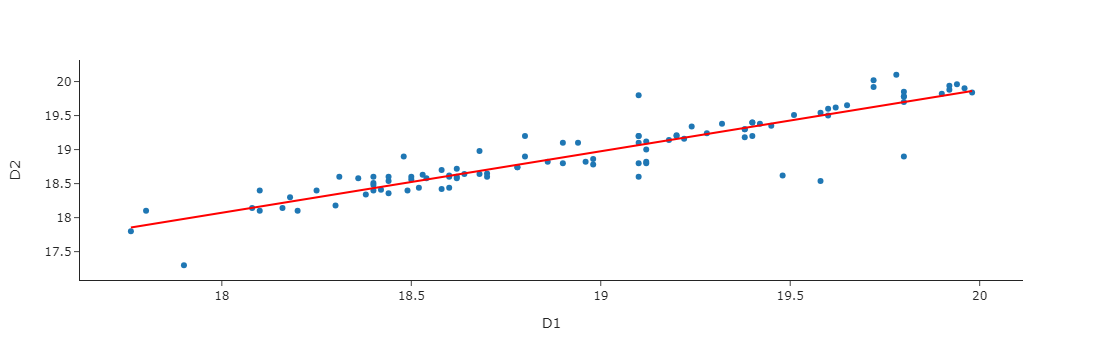

In [63]:
fig = px.scatter(df, x = df['D1'], y=df['D2'], trendline='ols', template = 'simple_white')
fig.data[-1].update(line={'color':'red'})

fig.show()

# Gráfico de Barras - Comparando média das medidas

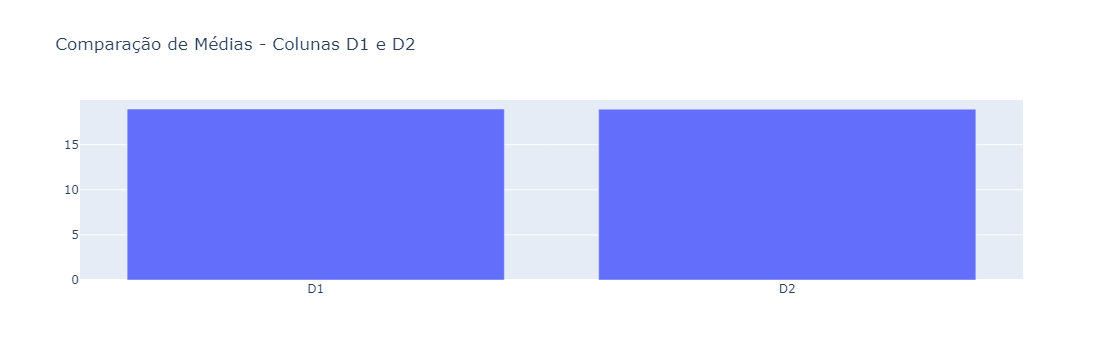

In [64]:
media_D1 = df['D1'].mean()
media_D2 = df['D2'].mean()

dados_barra = go.Bar(x=['D1', 'D2'], y=[media_D1, media_D2])

layout = go.Layout(title='Comparação de Médias - Colunas D1 e D2')

fig = go.Figure(data=dados_barra, layout=layout)

fig.show()